In [3]:
import pandas as pd
data=pd.read_csv("DATA.csv")
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [4]:
# CHECKING  NO OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [5]:
# DISTRIBUTION  OF Positive cases and negative cases 
data['MonkeyPox'].value_counts()

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

In [6]:
print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [7]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()

UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



In [8]:
#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_28264\270484086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [9]:
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

C:\Users\pulip\AppData\Local\Temp\ipykernel_28264\2458704213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


In [10]:
data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)

In [11]:
data['Systemic Illness'] = data['Systemic Illness'].fillna(0)

In [12]:
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,0,0,1,1,1,0,1,0,0,0
1,1,Fever,1,0,1,1,0,0,1,0,1
2,2,Fever,0,1,1,0,0,0,1,0,1
3,3,0,1,0,0,0,1,1,1,0,1
4,4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,0,1,1,0,1,1,0,0,1,1
24996,24996,Fever,0,1,1,0,1,1,1,1,1
24997,24997,0,1,1,0,0,1,1,0,0,1
24998,24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0,0


In [13]:
data.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,0,0,1,1,1,0,1,0,0,0
1,1,Fever,1,0,1,1,0,0,1,0,1
2,2,Fever,0,1,1,0,0,0,1,0,1
3,3,0,1,0,0,0,1,1,1,0,1
4,4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1


In [14]:
data.tail()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
24995,24995,0,1,1,0,1,1,0,0,1,1
24996,24996,Fever,0,1,1,0,1,1,1,1,1
24997,24997,0,1,1,0,0,1,1,0,0,1
24998,24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0,0
24999,24999,Swollen Lymph Nodes,0,0,1,0,0,1,1,0,1


In [15]:
data['Systemic Illness'].unique()


array([0, 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [16]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())


   Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0           0            0            1              1             1   
1           1            1            0              1             1   
2           2            0            1              1             0   
3           3            1            0              0             0   
4           4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_0  \
0                               0          0                True   
1                               0          1               False   
2                               0     

C:\Users\pulip\AppData\Local\Temp\ipykernel_28264\3259318246.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [17]:
data.drop("Systemic Illness_0",axis=1, inplace=True)

In [18]:
data


,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes
0,0,0,1,1,1,0,1,0,0,0,False,False,False
1,1,1,0,1,1,0,0,1,0,1,True,False,False
2,2,0,1,1,0,0,0,1,0,1,True,False,False
3,3,1,0,0,0,1,1,1,0,1,False,False,False
4,4,1,1,1,0,0,1,1,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,False,False,False
24996,24996,0,1,1,0,1,1,1,1,1,True,False,False
24997,24997,1,1,0,0,1,1,0,0,1,False,False,False
24998,24998,0,1,0,1,1,1,0,0,0,False,False,True


# Gradient Boosting 

Model Performance:
Accuracy: 70.52%
Precision: 72.39%
Recall: 88.26%
F1-score: 79.54%
AUC-ROC: 70.35%
Specificity: 37.69%
Confusion Matrix:
[[ 661 1093]
 [ 381 2865]]


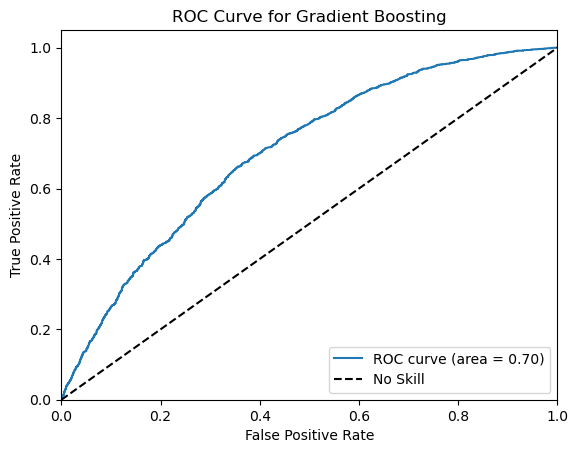

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score, roc_curve)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Model Performance:
Accuracy: 70.38%
Precision: 71.98%
Recall: 89.03%
F1-score: 79.60%
AUC-ROC: 68.90%
Specificity: 35.86%
Confusion Matrix:
[[ 629 1125]
 [ 356 2890]]


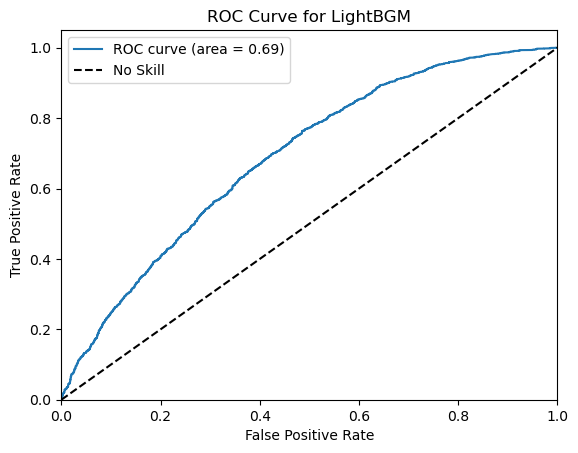

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score, roc_curve)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM classifier
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


# Import libraries for visualization (optional)
import matplotlib.pyplot as plt


# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightBGM')
plt.legend()
plt.show()

# Adaboost

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Performance:
Accuracy: 69.80%
Precision: 72.48%
Recall: 86.23%
F1-score: 78.76%
AUC-ROC: 70.59%
Specificity: 39.40%
Confusion Matrix:
[[ 691 1063]
 [ 447 2799]]


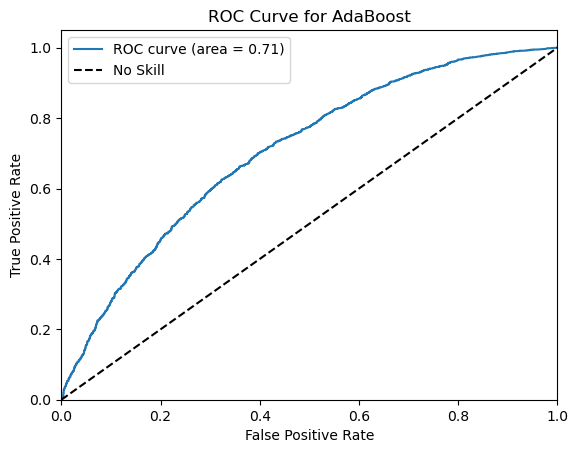

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score,roc_curve)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


# Import libraries for visualization (optional)
import matplotlib.pyplot as plt


# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend()
plt.show()

# Logistic Regression 

Model Performance:
Accuracy: 69.74%
Precision: 72.47%
Recall: 86.11%
F1-score: 78.70%
AUC-ROC: 70.76%
Specificity: 39.45%
Confusion Matrix:
[[ 692 1062]
 [ 451 2795]]


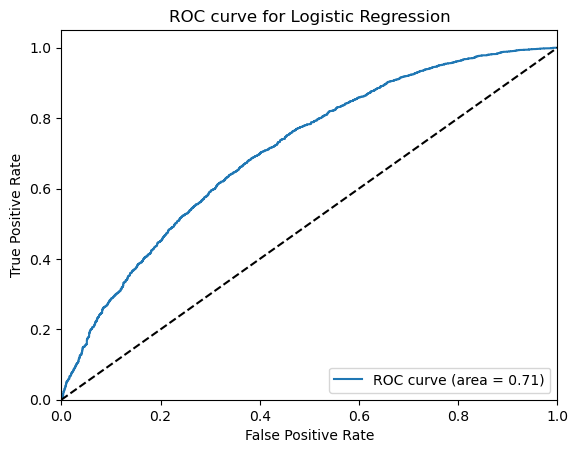

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score,roc_curve)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Navie Bayes 

Model Performance:
Accuracy: 69.14%
Precision: 72.68%
Recall: 84.07%
F1-score: 77.96%
AUC-ROC: 69.71%
Specificity: 41.51%
Confusion Matrix:
[[ 728 1026]
 [ 517 2729]]


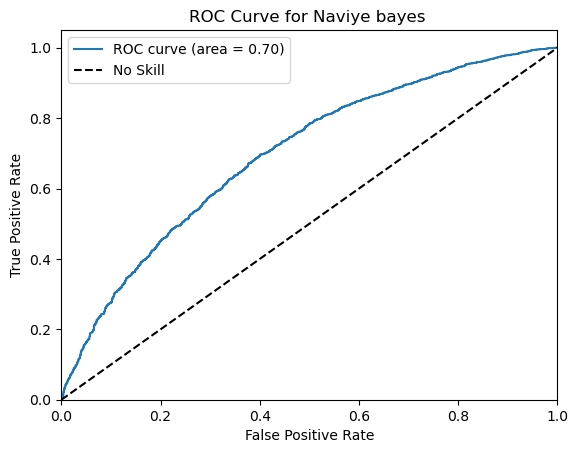

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred =nb_model.predict(X_test)
y_pred_proba =nb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve (optional)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naviye bayes ')
plt.legend()
plt.show()

# Xgboost

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [15:17:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance Metrics:
Model Performance:
Accuracy: 68.38%
Precision: 71.81%
Recall: 84.44%
F1-score: 77.62%
AUC-ROC: 66.55%
Specificity: 38.65%
Confusion Matrix:
[[ 678 1076]
 [ 505 2741]]


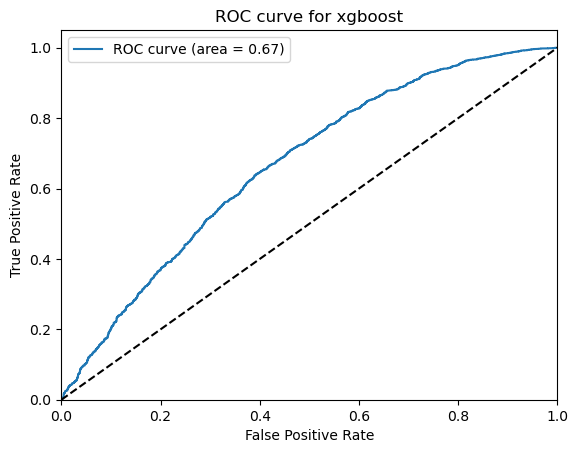

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score,roc_curve)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("XGBoost Performance Metrics:")
print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


# Optional: Plot ROC Curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Receiver Operating Characteristic (ROC) Curve
plt.title('ROC curve for xgboost')
plt.legend()
plt.show()

# SVM

Performance Metrics:
Accuracy: 0.6492
Precision: 0.6492
Recall: 1.0000
F1 Score: 0.7873
ROC/AUC: 0.6971
Specificity: 0.0000
Confusion Matrix:
[[   0 1754]
 [   0 3246]]


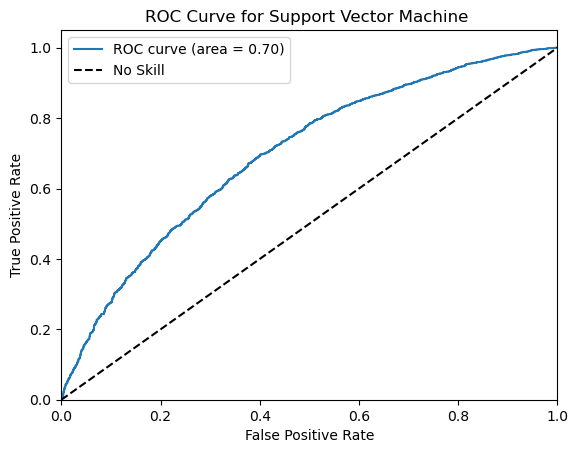

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for ROC/AUC calculation
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)


# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the ROC curve (optional)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine ')
plt.legend()
plt.show()

# Random Forest

Model Performance:
Accuracy: 61.00%
Precision: 70.10%
Recall: 69.62%
F1-score: 69.86%
AUC-ROC: 62.03%
Specificity: 45.04%
Confusion Matrix:
[[ 790  964]
 [ 986 2260]]


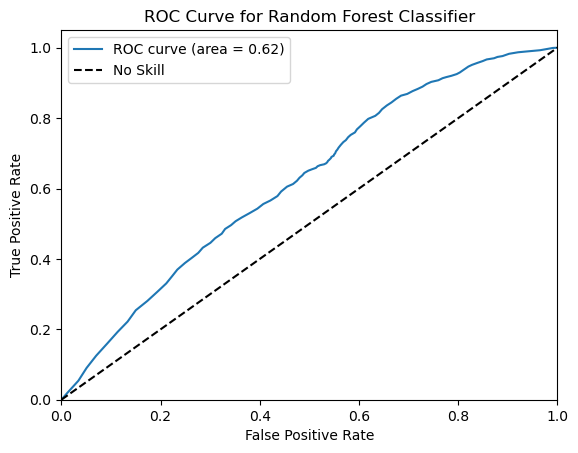

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve,f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

# Decision Tree

Model Performance:
Accuracy: 59.04%
Precision: 69.03%
Recall: 66.94%
F1-score: 67.97%
AUC-ROC: 55.68%
Specificity: 44.41%
Confusion Matrix:
[[ 779  975]
 [1073 2173]]


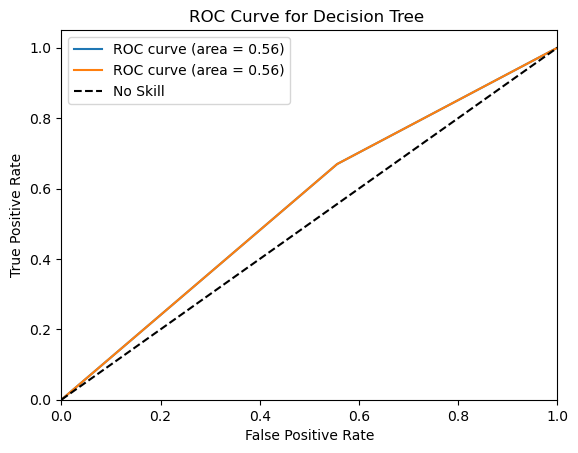

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, f1_score)

# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1= f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree ')
plt.legend()
plt.show()


# KNN

Performance Metrics:
Accuracy: 0.5688
Precision: 0.6471
Recall: 0.7384
F1 Score: 0.6898
ROC/AUC: 0.5005
Specificity: 0.2548
Confusion Matrix:
[[ 447 1307]
 [ 849 2397]]


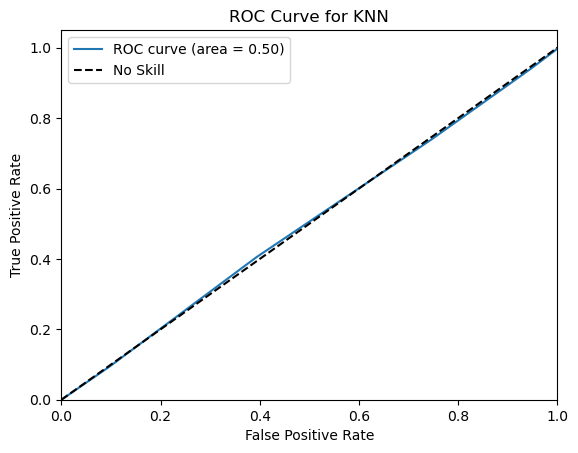

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, roc_auc_score, roc_curve, f1_score)


# Define features and target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC/AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print the results
print("Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC/AUC: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Import libraries for visualization (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve (optional)
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Comparision Of All Models 

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\xgboost\core.py:158: UserWarning: [16:27:24] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754


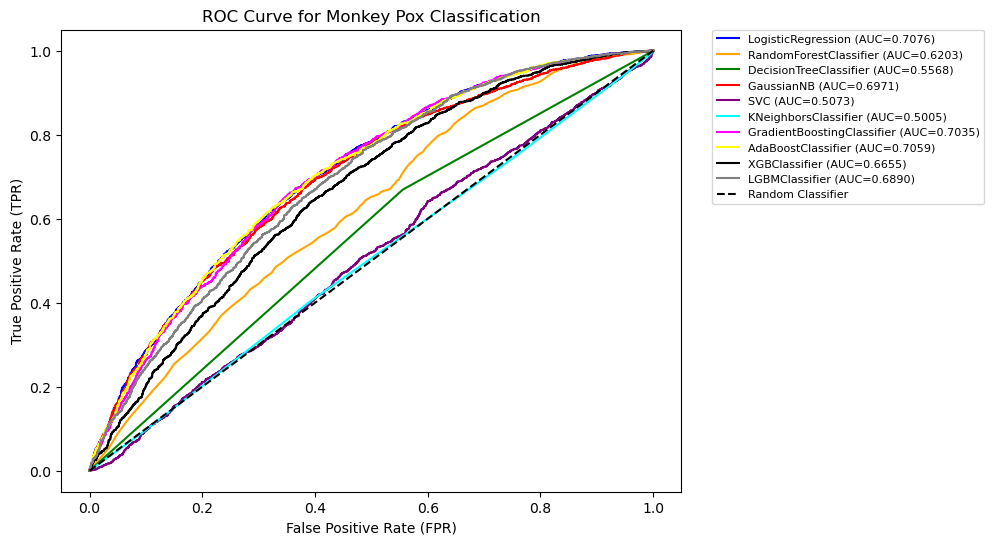

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = [LogisticRegression(max_iter=1000, random_state=42),
           LogisticRegression(max_iter=1000,random_state=42)
          RandomForestClassifier(n_estimators=100, random_state=42),
          DecisionTreeClassifier(random_state=42),
          GaussianNB(),
          SVC(probability=True, random_state=42),
          KNeighborsClassifier(n_neighbors=5),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(n_estimators=50, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
          LGBMClassifier(random_state=42)]

y_pred_proba_list = []
for model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_list.append(y_pred_proba)

# Plot ROC curves with different colors
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'grey']
for model, y_pred_proba, color in zip(models, y_pred_proba_list, colors):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{type(model).__name__} (AUC={roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Dashed line for random
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Monkey Pox Classification')
# Adjust legend position and size
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8,borderaxespad=0.0)  
plt.show()